In [5]:
import pandas as pd
from numpy import nan

#Helper function to convert stringlist to list 
def stringToList(string):
    # input format : "['str1', 'str2', ''str3]" , note the spaces after the commas, in this case I have a list of integers
    try:
        string = string[1:len(string)-1]
        if len(string) != 0: 
            tempList = string.split(", ")
            #print(tempList)
            newList = list(map(lambda x: str(x.replace("'","")), tempList))
        else:
            newList = []
    except:
        newList = nan
    return(newList)

#Define input file name
CSV_FILEPATH = 'news_20210331_232029.csv'

data = pd.read_csv(CSV_FILEPATH)
data["tweeturls"] = data["tweeturls"].apply(lambda x: stringToList(x))
data["tweethashtags"] = data["tweethashtags"].apply(lambda x: stringToList(x))
data["tweetmentions"] = data["tweetmentions"].apply(lambda x: stringToList(x))

In [13]:
data.shape

(23326, 18)

In [12]:
data['tweettextcleaned'].str.split().str.len().sum()

366912.0

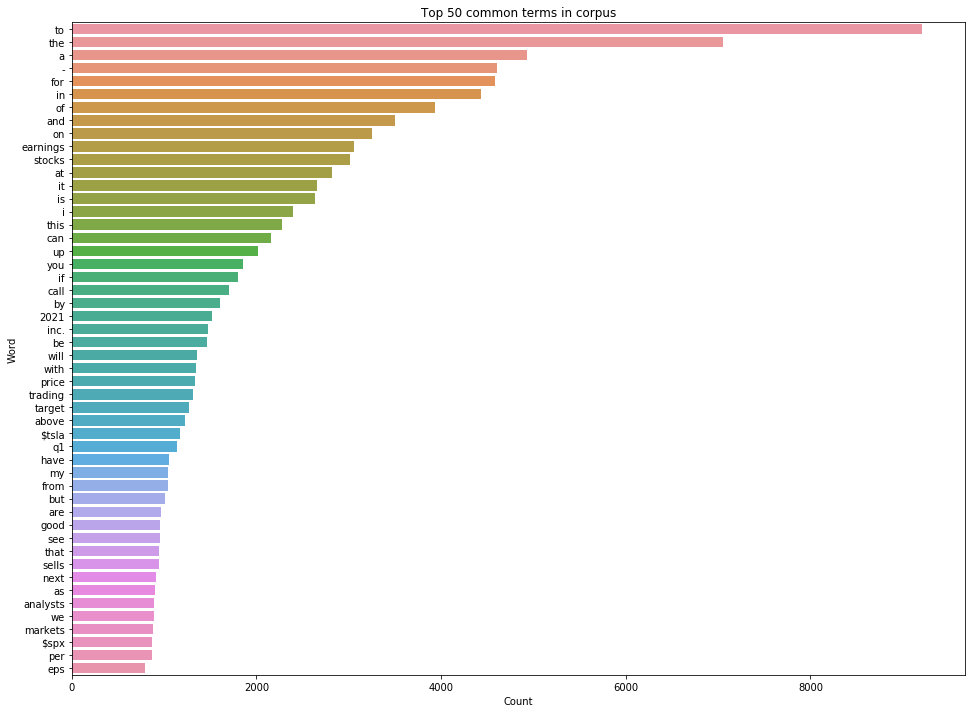

In [37]:
from collections import Counter
import seaborn as sb
import matplotlib.pyplot as plt



results = Counter()
data['tweettextcleaned'].str.lower().str.split().dropna().apply(results.update)

fig, ax = plt.subplots(figsize=(16,12))

key_list = []
value_list = []
for (key, val) in results.most_common(50):
    key_list.append(key)
    value_list.append(val)

sb.barplot(y=key_list, x=value_list)
plt.xlabel('Count'); plt.ylabel('Word'); 
plt.title('Top 50 common terms in corpus');
plt.show()